#**Вторая лабораторная работа**#

Вариант 22

Выполнил:

Суханкулиев Мухаммет,
студент группы N3246

поток Мат Стат 28.3

**Цель и постановка задач**

Для распределения Бернулли по выборке

$$\begin{matrix}
1, & 1, & 1, & 1, & 1, & 1, & 1, & 0, & 0, & 0, \\
0, & 1, & 1, & 0, & 1, & 0, & 1, & 0, & 1, & 0, \\
0, & 1, & 0, & 0, & 1, & 1, & 0, & 1, & 1, & 0, \\
1, & 0, & 0, & 0, & 0, & 0, & 0, & 1, & 0, & 0, \\
0, & 1, & 1, & 1, & 0, & 1, & 1, & 0, & 1, & 1
\end{matrix}$$

1. найти точечную оценку параметра $\theta$ методом максимального правдоподобия

2. построить доверительный интервал уровня доверия $\alpha=95\%$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

Исходные данные из файла
https://drive.google.com/file/d/1mVGYiki4QSOImCs0HwzK8i-pJPhIFAO9

(Вариант 22)

In [ ]:
data = np.array([
    1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
    0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
    0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
    1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
    0, 1, 1, 1, 0, 1, 1, 0, 1, 1
])

n = len(data)
print(f"Объем выборки n = {n}")

Объем выборки n = 50


**1. Точечная оценка параметра $\theta$**

Распределение Бернулли $X_i\sim Bern(\theta)$:
$$P(X=x)=\theta^x(1-\theta)^{1-x}, x\in\{0,1\}$$

**Метод максимального правдоподобия**

Функция вероятности:
$$F(x,\theta)=\theta^x(1-\theta)^{1-x}$$

Функция правдоподобия:
$$L(\theta)=∏_{i=1}^n{\theta^{x_i}(1-\theta)^{1-x_i}}$$

Используем свойства степени и произведения:
$$L(\theta)=\theta^{\sum{x_i}}(1-\theta)^{n-\sum{x_i}}$$

Берём натуральный логарифм:
$$lnL(\theta)=\sum{x_i}\cdot ln\theta+(n-\sum{x_i})\cdot ln(1-\theta)$$

Производная по $\theta$:
$$\frac{d}{d\theta}lnL(\theta)=\frac{\sum{x_i}}{\theta}-\frac{n-\sum{x_i}}{1-\theta}$$

Приравняем производную к нулю:
$$\frac{\sum{x_i}}{\theta}-\frac{n-\sum{x_i}}{1-\theta}=0$$

$$(1-\theta)\cdot \sum{x_i}=\theta\cdot (n-\sum{x_i})$$

$$\sum{x_i}-\theta\sum{x_i}=\theta n-\theta\sum{x_i}$$

$$\sum{x_i}=\theta n⇒\hat{\theta}=\frac{1}{n}\sum{x_i}=\bar{x}$$

или
$$\hat{\theta}_{МП}=\bar{x}$$

In [ ]:
# Метод моментов и ММП — совпадают
theta_hat = np.mean(data)
print(f"Оценка параметра θ: θ̂ = {theta_hat:.15g}")

Оценка параметра θ: θ̂ = 0.52


**2. Доверительный интервал для $\theta$ при $\alpha=0.95$**

Так как $\hat{\theta}-$ это выборочная доля успехов, то его распределение можно аппроксимировать нормальным распределением

ЦПТ: выборочная сумма или доля приближается к нормальному распределению, даже если исходная случайная величина была не нормальной:
$$\hat{\theta}\sim N(\theta,\frac{\theta(1-\theta)}{n})$$где

Среднее: $𝔼[\hat{\theta}]=\theta$

Дисперсия: $𝔻[\hat{\theta}]=\frac{\theta(1-\theta)}{n})$

Стандартное отклонение: $\sqrt{\frac{\theta(1-\theta)}{n})}$

$Z\sim N(0,1)$ — стандартное нормальное распределение.

Используется для перехода от произвольной нормальной величины к табличному распределению с $\mu =0$ и $\sigma=1$.

при $n\rightarrow\infty$ (или хотя бы $n>30$):
$$Z=\frac{X-\mu}{\sigma}$$
или в нашем случае:
$$X=\bar{x}$$
$$\mu=\theta$$
$$\sigma=\sqrt{\frac{\theta(1-\theta)}{n})}$$

$$Z=\frac{\sqrt{n}(\bar{x}-\theta)}{\sqrt{\bar{x}(1-\bar{x})}}$$

Тогда симметричный доверительный интервал уровня доверия $\alpha$:
$$P(T_1\leq\theta\leq T_2)=\alpha$$

или
$$P(-C\leq \frac{\sqrt{n}(\bar{x}-\theta)}{\sqrt{\bar{x}(1-\bar{x})}}\leq C)=\alpha$$
где $C-$ это квантиль.
$$P(-z_{1-S_{хвостика}}\leq Z\leq z_{1-S_{хвостика}})=\alpha$$
где
$$S_{хвостика}=\frac{1-\alpha}{2}$$
Тогда:
$$z_{1-S_{хвостика}}=1-\frac{1-\alpha}{2}=\frac{1+\alpha}{2}=0.975$$
По таблице стандартного нормального распределения:
$$z_{0.975}=1.96$$
Получаем неравенство:
$$P(-1.96\leq \frac{\sqrt{n}(\bar{x}-\theta)}{\sqrt{\bar{x}(1-\bar{x})}}\leq 1.96)=\alpha$$
Получим оценку $\theta$:
$$-\frac{1.96\cdot \sqrt{\bar{x}(1-\bar{x})}}{\sqrt{n}} \leq \bar{x}-\theta \leq \frac{1.96\cdot \sqrt{\bar{x}(1-\bar{x})}}{\sqrt{n}}$$

Преобразуем:
$$\bar{x}+1.96\sqrt{\frac{\bar{x}(1-\bar{x})}{n}} \geq \theta \geq \bar{x}-1.96\sqrt{\frac{\bar{x}(1-\bar{x})}{n}}$$

In [ ]:
z = 1.96 # z_(0.975)
# Ширина интервала
interval_radius = z * np.sqrt(theta_hat * (1 - theta_hat) / n)

ci_lower = theta_hat - interval_radius
ci_upper = theta_hat + interval_radius

print(f"Доверительный интервал при α = 0.95: [{ci_lower:.4f}, {ci_upper:.4f}]")

Доверительный интервал при α = 0.95: [0.3815, 0.6585]


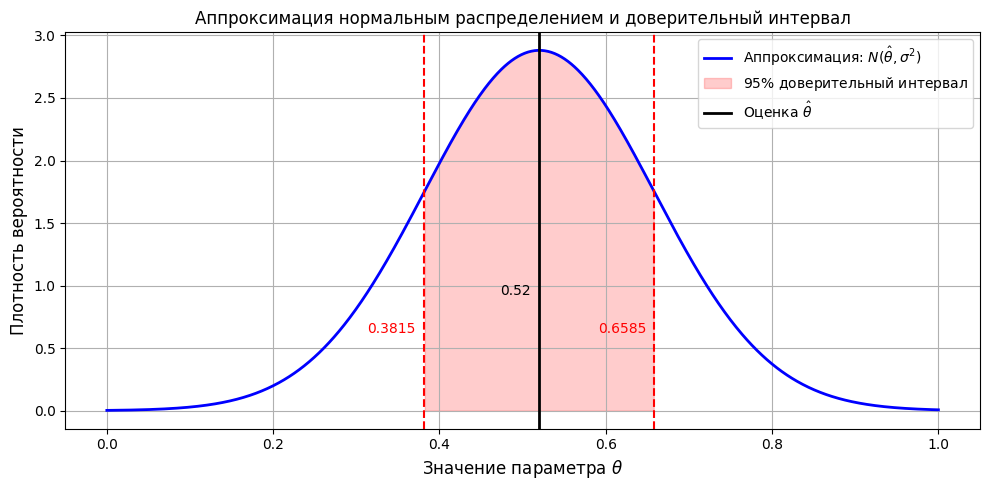

In [ ]:
# Построение графика
plt.figure(figsize=(10, 5))
x = np.linspace(0, 1, 1000)
pdf = st.norm.pdf(x, loc=theta_hat, scale=interval_radius)
# График плотности
plt.plot(x, pdf, color='blue', label=r'Аппроксимация: $N(\hat{\theta}, \sigma^2)$', linewidth=2)
# Закрашенная область — доверительный интервал
plt.fill_between(x, 0, pdf, where=(x >= ci_lower) & (x <= ci_upper),
                 color='red', alpha=0.2, label=r'$95\%$ доверительный интервал')
# Вертикальные линии
plt.axvline(theta_hat, color='black', linestyle='-', linewidth=2, label=r'Оценка $\hat{\theta}$')
plt.axvline(ci_lower, color='red', linestyle='--', linewidth=1.5)
plt.axvline(ci_upper, color='red', linestyle='--', linewidth=1.5)
# Аннотации
x_shift = 0.01
plt.text(theta_hat - x_shift, 0.9, f'{theta_hat:.15g}', ha='right', va='bottom', fontsize=10)
plt.text(ci_lower - x_shift, 0.6, f'{ci_lower:.4f}', ha='right', va='bottom', fontsize=10, color='red')
plt.text(ci_upper - x_shift, 0.6, f'{ci_upper:.4f}', ha='right', va='bottom', fontsize=10, color='red')
# Оформление
plt.title('Аппроксимация нормальным распределением и доверительный интервал', fontsize=12)
plt.xlabel(r'Значение параметра $\theta$', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Ответы**

1. Для заданной выборки, точечная оценка параметра $\hat{\theta}$, рассчитанная методом максимального правдоподобия, равна:
$$\hat{\theta}=0.52$$

2. Доверительный интервал для параметра $\hat{\theta}$ с уровнем доверия $95%$ для выборки из $50$ элементов составляет:
$$[0.3815, 0.6585]$$

#**Заключение**#

В ходе выполнения лабораторной работы были получены следующие результаты:

1. Точечная оценка параметра методом максимального правдоподобия соответствует средней доле успехов в выборке.

2. Доверительный интервал для параметра $\theta$ с уровнем доверия $95%$ подтверждает, что истинное значение $\theta$ с вероятностью 95% находится внутри данного интервала.